In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
pd.set_option('display.max_columns', 1000, 'display.max_colwidth', 1000, 'display.max_rows',1000)

# Data Read "elon-musk-tweets" file

In [2]:
df1 = pd.read_csv('data/elon-musk-tweets.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13610 entries, 0 to 13609
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            13590 non-null  object
 1   username        13610 non-null  object
 2   linktotweet     13610 non-null  object
 3   tweetembedcode  13610 non-null  object
 4   createdat       13610 non-null  object
dtypes: object(5)
memory usage: 531.8+ KB


In [3]:
start = '2015-03-15'
end = '2022-03-14'

In [4]:
df1 = df1[(df1.createdat >= start) & (df1.createdat <= end)][['text','createdat']]\
    .sort_values(by='createdat', ascending=False)\
    .reset_index(drop = True)
df1.rename(columns={'text':'Content', 'createdat':'Time'}, inplace = True)

def date_time(x):
    x = str.split(x,sep='T')
    time = str.split(x[0],sep="-")
    year = int(time[0])
    mon = int(time[1])
    day = int(time[2])

    time = str.split(x[1],sep=":")
    hr = int(time[0])
    min = int(time[1])
    sec = int(time[2])
    sec = int('0')

    date = datetime(year=year,month=mon,day=day,hour=hr, minute=min, second=sec)
    date = date-timedelta(hours=5) # Timezone

    return date

df1['Time'] = df1.Time.apply(lambda x: date_time(x))

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13610 entries, 0 to 13609
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Content  13590 non-null  object        
 1   Time     13610 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 212.8+ KB


# Data Read "Elon Musk 2" file

In [5]:
df2 = pd.read_csv('data/Elon Musk 2.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7918 entries, 0 to 7917
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PostID         7918 non-null   int64 
 1   Time           7918 non-null   object
 2   TweetUrl       7918 non-null   object
 3   Content        7918 non-null   object
 4   UserID         7918 non-null   int64 
 5   UserName       7918 non-null   object
 6   RetweetNum     7918 non-null   int64 
 7   LikeNum        7918 non-null   int64 
 8   ReplyNum       7918 non-null   int64 
 9   UserHandle     7918 non-null   object
 10  UserUrl        7918 non-null   object
 11  Location       112 non-null    object
 12  UserID_PostID  7918 non-null   object
 13  CurrentPage    7918 non-null   int64 
dtypes: int64(6), object(8)
memory usage: 866.2+ KB


In [6]:
from datetime import datetime
months_in_year = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months_in_year.index('Jan')

df2 = df2[['Content','Time']].sort_values(by='Time')

def time_convert(x):
    x = str.split(x)
    year = int(x[-1])
    mon = int(months_in_year.index(x[1])+1)
    day = int(x[2])
    time = x[3].split(':')
    hr = int(time[0])
    min = int(time[1])
    sec = int(time[2])
    sec = int('0')
    date = datetime(year=year,month=mon,day=day,hour=hr, minute=min, second=sec)
    date = date-timedelta(hours=5) # timezone difference
    return date

df2['Time'] = df2.Time.apply(lambda x: time_convert(x))

df2 = df2[(df2.Time >= start) & (df2.Time <= end)].sort_values(by='Time',ascending=False)
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7917 entries, 511 to 556
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Content  7917 non-null   object        
 1   Time     7917 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 185.6+ KB


# Combine two dataset

In [7]:
data = df1.append(df2).drop_duplicates(subset=['Time']).reset_index(drop=False)
print(("min Time: "+str(data.Time.min())))
print(("max Time: "+str(data.Time.max())))
data.to_csv("data/combined_data.csv", sep=',', index=False)
data.info()

min Time: 2017-06-19 04:32:00
max Time: 2022-03-11 14:41:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17347 entries, 0 to 17346
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   index    17347 non-null  int64         
 1   Content  17327 non-null  object        
 2   Time     17347 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 406.7+ KB


/var/folders/0f/s8khq6c91r5dp2kn1ggjqb800000gn/T/ipykernel_15103/4152981471.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = df1.append(df2).drop_duplicates(subset=['Time']).reset_index(drop=False)


## Tweet Content Cleaning

In [8]:
df = pd.read_csv('data/combined_data.csv').iloc[:,1:]
df['Time'] = df.Time.apply(pd.to_datetime)
df = df.dropna(how='any')
df.head()

,Content,Time
0,"@haltman Little do they know, birds aren't real! https://t.co/mBPzUQMxRN",2022-03-11 14:41:00
1,@waitbutwhy What if one atom at a time in your body was switched out for another atom? There would be you with all new atoms and another you with the original atoms - Human of Theseus.,2022-03-10 19:31:00
2,@WholeMarsBlog @Erdayastronaut @CopSub This weekend,2022-03-10 00:44:00
3,"@FedorovMykhailo @OMarkarova You're welcome. We have also sent power adapters for car cigarette lighters, solar/battery packs and generators for places where electricity is not available.",2022-03-09 16:49:00
4,"@PPathole @SpaceX Optimized, fully-reusable Starship is ~150t to same reference orbit as Saturn V. In expendable mode, Starship payload would be 250t to 300t.",2022-03-09 16:41:00


In [9]:
# To clean up texts
import re
import nltk
# nltk.download() Download nltk data for first time use (download all packages)
import nltk.data
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# nltk.download('wordnet')
# nltk.download('punkt')
tokenizer = nltk.data.load('nltk:tokenizers/punkt/english.pickle')
from nltk.corpus import stopwords
# nltk.download('stopwords')


In [10]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def sentence_to_wordlist(sentence, remove_stopwords=False):
    # 0. remove mentions(@), Hashtag(#)
    sentence = re.sub(r'@[^\s]+', '', sentence,flags=re.MULTILINE )
    sentence = re.sub(r'#[^\s]+', '', sentence,flags=re.MULTILINE )
    sentence = re.sub(r'RT[^\s]+', '', sentence,flags=re.MULTILINE )
    # 1. drop http
    p1=re.compile(r'http?:\/\/\S+', flags=re.DOTALL)
    sentence = re.sub(p1, '', sentence)
    # 2. drop https
    p1=re.compile(r'https?:\/\/\S+', flags=re.DOTALL)
    sentence = re.sub(p1, '', sentence)
    # 3. Remove non-letters
    sentence = re.sub(r'[^\w\s]','', sentence)
    # 4. Remove all numbers
    sentence = re.sub(r'[0-9]+', '', sentence)
    # 5. Convert words to lower case and split them
    sentence = sentence.lower().split()
    # Remove Stop Words
    # sentence = [word for word in sentence if not word in stop_words]
    # 5. Stemming
    # sentence = [stemmer.stem(w) for w in sentence] 
    # 6. Lemmatizing
    sentence = [lemmatizer.lemmatize(word) for word in sentence]

    #check if returned sentence is blank
    if len(sentence)==0:
      return np.nan
    else:
      # 7. Return a sentence of words
      sentence_r = ''
      for word in sentence:
        sentence_r = sentence_r + ' ' + word
      return(sentence_r)

def cleanText(text):
  text = re.sub('@[A-Za-z0-9]+' , '', text) #remove the @mentions
  text = re.sub('https?:\/\/\S+' , '', text) #remove the hyperlinks
  text = re.sub(r'#', '', text) #removing #tags
  text = re.sub(r'RT[\s]+', '', text) #removing RT(ReTweets)
  return text

In [11]:
# create a new column 
df['Content1']= df.Content.apply(lambda row: sentence_to_wordlist(row))
df.dropna(how='any', inplace=True)
# df[['Time','Content1','Content']].iloc[-5:,:]

# Sentiment Analysis

Textblob vs VADER (NLTK)
- https://www.analyticsvidhya.com/blog/2021/10/sentiment-analysis-with-textblob-and-vader/

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def polarityScore(a, col):
    # Create a column for score
    a['score'] = a[col].apply(lambda row: calculate_polarity_scores(row))
    #split all the scores into separate columns
    # columns = ['negative', 'neutral', 'positive', 'compound'])
    a['negative']=a.score.apply(lambda x: x[0])
    a['neutral']=a.score.apply(lambda x: x[1])
    a['positive']=a.score.apply(lambda x: x[2])
    a['combined']=a.score.apply(lambda x: x[3])

    return a

def calculate_polarity_scores(x):
    sid = SentimentIntensityAnalyzer()
    score = sid.polarity_scores(x)
    score_list = []
    for i in score.values():
        score_list.append(i)
    return score_list

import matplotlib.pyplot as plt
result = polarityScore(df, 'Content1')
import seaborn as sns

sns.histplot(data=result, x='compound',bins=10)

In [13]:
result = polarityScore(df, 'Content1')
# sns.histplot(data=result, x='compound')
result

,Content,Time,Content1,score,negative,neutral,positive,combined
0,"@haltman Little do they know, birds aren't real! https://t.co/mBPzUQMxRN",2022-03-11 14:41:00,little do they know bird arent real,"[0.0, 1.0, 0.0, 0.0]",0.000,1.000,0.000,0.0000
1,@waitbutwhy What if one atom at a time in your body was switched out for another atom? There would be you with all new atoms and another you with the original atoms - Human of Theseus.,2022-03-10 19:31:00,what if one atom at a time in your body wa switched out for another atom there would be you with all new atom and another you with the original atom human of theseus,"[0.0, 0.933, 0.067, 0.3182]",0.000,0.933,0.067,0.3182
2,@WholeMarsBlog @Erdayastronaut @CopSub This weekend,2022-03-10 00:44:00,this weekend,"[0.0, 1.0, 0.0, 0.0]",0.000,1.000,0.000,0.0000
3,"@FedorovMykhailo @OMarkarova You're welcome. We have also sent power adapters for car cigarette lighters, solar/battery packs and generators for places where electricity is not available.",2022-03-09 16:49:00,youre welcome we have also sent power adapter for car cigarette lighter solarbattery pack and generator for place where electricity is not available,"[0.0, 0.88, 0.12, 0.4588]",0.000,0.880,0.120,0.4588
4,"@PPathole @SpaceX Optimized, fully-reusable Starship is ~150t to same reference orbit as Saturn V. In expendable mode, Starship payload would be 250t to 300t.",2022-03-09 16:41:00,optimized fullyreusable starship is t to same reference orbit a saturn v in expendable mode starship payload would be t to t,"[0.0, 0.842, 0.158, 0.4588]",0.000,0.842,0.158,0.4588
...,...,...,...,...,...,...,...,...
17342,Motor Trend awards Tesla Model S best Car of the Year ever in their 70 year history!!\n https://t.co/TiMsQ3REvH,2019-07-11 12:30:00,motor trend award tesla model s best car of the year ever in their year history,"[0.0, 0.628, 0.372, 0.8271]",0.000,0.628,0.372,0.8271
17343,@elonmusk From even the greatest of horrors irony is seldom absent.\n\nhttps://t.co/DxIpjzeVTO\n\nElon.. https://t.co/HEDlwkwlhM,2019-02-25 16:51:00,from even the greatest of horror irony is seldom absent elon,"[0.287, 0.468, 0.246, 0.0772]",0.287,0.468,0.246,0.0772
17344,"อ่ะ สำหรับติ่ง Elon Musk (อย่างผม) .. ช่องทางติดตามอาเฮียที่เร็วที่สุดคือ twitter ไม่ต้องรอสื่อมาเล่าต่อ แค่ต้องแปลเองนิดนึง\n\n&gt;&gt; https://t.co/oxpRr3Ggf6 &lt;&lt;\n\nโดยทวีตล่าสุดเมื่อ 3 ชั่วโมงที่แล้ว อาเฮียบอกว่า \n\n""Some good feedback from cave... https://t.co/oxpRr3Ggf6",2018-07-07 06:08:00,อะ สำหรบตง elon musk อยางผม ชองทางตดตามอาเฮยทเรวทสดคอ twitter ไมตองรอสอมาเลาตอ แคตองแปลเองนดนง gtgt ltlt โดยทวตลาสดเมอ ชวโมงทแลว อาเฮยบอกวา some good feedback from cave,"[0.0, 0.861, 0.139, 0.4404]",0.000,0.861,0.139,0.4404
17345,Very proud to have scored 100/100 for the fourth year in a row in LGBTQ equality. Thanks to everyone at Tesla for making LGBTQ inclusion an important part of our culture. https://t.co/ZUlgYbILSD,2017-12-14 16:12:00,very proud to have scored for the fourth year in a row in lgbtq equality thanks to everyone at tesla for making lgbtq inclusion an important part of our culture,"[0.0, 0.763, 0.237, 0.796]",0.000,0.763,0.237,0.7960


<AxesSubplot:xlabel='combined', ylabel='Count'>

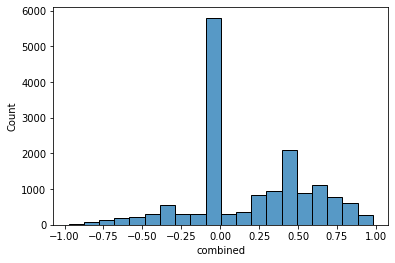

In [14]:
import seaborn as sns
sns.histplot(data=result, x='combined',bins=20)

## Work on truncated data to develop algorithms for

In [15]:
# Get US holidays
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2016-01-01', end='2022-12-31').to_pydatetime()
holiday_date = []
for days in holidays:
    holiday_date.append(days.date())

#check weekend or US holiday
def IsHoliday(x,holiday_date):
    date = x.date()
    weekday = x.weekday()
    if (date in holiday_date) | (weekday==5) | (weekday==6):
        return True #it is holiday
    else:
        return False #it is not holiday

#during market or after market
def IsAfterMkt(x):
    x = x.time()
    starttime = datetime.strptime('9:30:00','%H:%M:%S').time()
    endtime = datetime.strptime('16:00:00','%H:%M:%S').time()
    if ((x >= starttime) & (x<=endtime)):
         return False
    else:
        return True

# Same day or next day
def IsSameDay(x):
    x = x.time()
    samedaystarttime = datetime.strptime('00:00:00','%H:%M:%S').time()
    samedayndtime = datetime.strptime('9:30:00','%H:%M:%S').time()
    if ((x >= samedaystarttime) & (x < samedayndtime)):
        return True
    else:
        return False



If markets are closed, then we track next business day's OPEN price trend.
If marked are open, then we track same business day's CLOSE price trend.

# Apply Transformations to all data

In [16]:
result['IsHoliday'] = result.Time.apply(lambda row: IsHoliday(row,holiday_date))
result['IsAfterMkt'] = result.Time.apply(lambda row: IsAfterMkt(row))
result['MktClose']= result.IsHoliday | result.IsAfterMkt
result['IsSameDay'] = result.Time.apply(lambda row: IsSameDay(row))
result['date'] = result.Time.apply(lambda row: row.date())
result['revised-date'] = result[['IsSameDay','MktClose','date']].apply(lambda x: x['date'] if (x['IsSameDay']==True & x['MktClose']==True) else x['date']+timedelta(days=1), axis=1)  # need to revise to see if next day is also a holiday
result.sort_values(by=['Time'])

,Content,Time,Content1,score,negative,neutral,positive,combined,IsHoliday,IsAfterMkt,MktClose,IsSameDay,date,revised-date
17346,Elon Musk posted a video on Twitter from the plant in California for the assembly of carrier rockets Falcon. info: https://t.co/mtFfOOr4Yk,2017-06-19 04:32:00,elon musk posted a video on twitter from the plant in california for the assembly of carrier rocket falcon info,"[0.0, 1.0, 0.0, 0.0]",0.000,1.000,0.000,0.0000,False,True,True,True,2017-06-19,2017-06-19
13264,@highqualitysh1t I love the thought of a car drifting apparently endlessly through space and perhaps being discovered by an alien race millions of years in the future,2017-12-02 14:33:00,i love the thought of a car drifting apparently endlessly through space and perhaps being discovered by an alien race million of year in the future,"[0.0, 0.846, 0.154, 0.6369]",0.000,0.846,0.154,0.6369,True,False,True,False,2017-12-02,2017-12-03
13263,@novaspivack Asimov's Foundation books should def be part of the mission. They're amazing.,2017-12-02 17:46:00,asimov foundation book should def be part of the mission theyre amazing,"[0.0, 0.743, 0.257, 0.5859]",0.000,0.743,0.257,0.5859,True,True,True,False,2017-12-02,2017-12-03
13262,@novaspivack That's certainly the right way to go to store massive amounts of data for a long time,2017-12-02 19:01:00,thats certainly the right way to go to store massive amount of data for a long time,"[0.0, 0.862, 0.138, 0.34]",0.000,0.862,0.138,0.3400,True,True,True,False,2017-12-02,2017-12-03
13261,"To preserve the transcendent majesty &amp; specialness of The Boring Company cap, we are capping cap orders at 50,000 caps. Almost there ... https://t.co/YqjEQAfy3u",2017-12-03 14:05:00,to preserve the transcendent majesty amp specialness of the boring company cap we are capping cap order at cap almost there,"[0.103, 0.897, 0.0, -0.3182]",0.103,0.897,0.000,-0.3182,True,False,True,False,2017-12-03,2017-12-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,"@PPathole @SpaceX Optimized, fully-reusable Starship is ~150t to same reference orbit as Saturn V. In expendable mode, Starship payload would be 250t to 300t.",2022-03-09 16:41:00,optimized fullyreusable starship is t to same reference orbit a saturn v in expendable mode starship payload would be t to t,"[0.0, 0.842, 0.158, 0.4588]",0.000,0.842,0.158,0.4588,False,True,True,False,2022-03-09,2022-03-10
3,"@FedorovMykhailo @OMarkarova You're welcome. We have also sent power adapters for car cigarette lighters, solar/battery packs and generators for places where electricity is not available.",2022-03-09 16:49:00,youre welcome we have also sent power adapter for car cigarette lighter solarbattery pack and generator for place where electricity is not available,"[0.0, 0.88, 0.12, 0.4588]",0.000,0.880,0.120,0.4588,False,True,True,False,2022-03-09,2022-03-10
2,@WholeMarsBlog @Erdayastronaut @CopSub This weekend,2022-03-10 00:44:00,this weekend,"[0.0, 1.0, 0.0, 0.0]",0.000,1.000,0.000,0.0000,False,True,True,True,2022-03-10,2022-03-10
1,@waitbutwhy What if one atom at a time in your body was switched out for another atom? There would be you with all new atoms and another you with the original atoms - Human of Theseus.,2022-03-10 19:31:00,what if one atom at a time in your body wa switched out for another atom there would be you with all new atom and another you with the original atom human of theseus,"[0.0, 0.933, 0.067, 0.3182]",0.000,0.933,0.067,0.3182,False,True,True,False,2022-03-10,2022-03-11


80% of the tweets are indeed made when markets are closed.

<AxesSubplot:xlabel='MktClose', ylabel='Percent'>

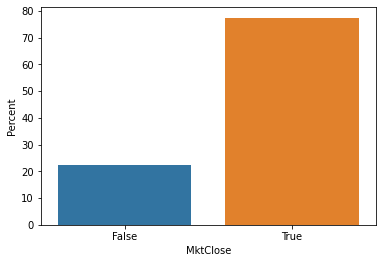

In [17]:
#sns.countplot(data=result, x='MktClose')
data = result.groupby(by=['MktClose']).date.count()/len(result.date)*100
data = pd.DataFrame(data)
data.reset_index(inplace=True, drop=False)
data.columns = ['MktClose', 'Percent']
sns.barplot(x='MktClose', y='Percent',data=data)

In [18]:
data = result.groupby(by=['revised-date','MktClose']).combined.mean().\
    reset_index().sort_values(by=['revised-date','MktClose'])
data

,revised-date,MktClose,combined
0,2017-06-19,True,0.000000
1,2017-12-03,True,0.520933
2,2017-12-04,True,-0.086491
3,2017-12-08,False,0.000000
4,2017-12-08,True,0.201050
...,...,...,...
2089,2022-03-09,True,0.140300
2090,2022-03-10,False,0.356300
2091,2022-03-10,True,0.098575
2092,2022-03-11,True,0.318200
